In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

In [2]:
#converting txt file to csv file

In [4]:
with open('heartdisease.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",")for line in stripped if line)
    with open('heartdisease.csv','w')as out_file:
          writer = csv.writer(out_file)
          writer.writerow(('age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'))
          writer.writerows(lines)

In [5]:
#reading CSV using pandas and storing in dataframe
df = pd.read_csv('heartdisease.csv', header=None)

In [7]:
training_x = df.iloc[1:df.shape[0], 0:13]
print(training_x)



       0    1    2      3      4    5    6      7    8    9    10   11   12
1    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0
2    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0
3    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0
4    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0
5    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0
6    56.0  1.0  2.0  120.0  236.0  0.0  0.0  178.0  0.0  0.8  1.0  0.0  3.0
7    62.0  0.0  4.0  140.0  268.0  0.0  2.0  160.0  0.0  3.6  3.0  2.0  3.0
8    57.0  0.0  4.0  120.0  354.0  0.0  0.0  163.0  1.0  0.6  1.0  0.0  3.0
9    63.0  1.0  4.0  130.0  254.0  0.0  2.0  147.0  0.0  1.4  2.0  1.0  7.0
10   53.0  1.0  4.0  140.0  203.0  1.0  2.0  155.0  1.0  3.1  3.0  0.0  7.0
11   57.0  1.0  4.0  140.0  192.0  0.0  0.0  148.0  0.0  0.4  2.0  0.0  6.0
12   56.0  0.0  2.0  140.0  294.0  0.0  2.0  153.0  0.0  1.3  2.0  0.0  3.0
13   56.0  1

In [8]:
training_y = df.iloc[1:df.shape[0], 13:14]

In [9]:
print(training_y)


    13
1    0
2    2
3    1
4    0
5    0
6    0
7    3
8    0
9    2
10   1
11   0
12   0
13   2
14   0
15   0
16   0
17   1
18   0
19   0
20   0
21   0
22   0
23   1
24   3
25   4
26   0
27   0
28   0
29   0
30   3
..  ..
274  0
275  1
276  0
277  0
278  0
279  1
280  0
281  2
282  0
283  3
284  0
285  2
286  4
287  2
288  0
289  0
290  0
291  1
292  0
293  2
294  2
295  1
296  0
297  3
298  1
299  1
300  2
301  3
302  1
303  0

[303 rows x 1 columns]


In [12]:
#converting dataframe into arrays
x = np.array(training_x)
y = np.array(training_y)




Test Train Split no.  1 





Gaussian Naive Bayes model accuracy(in %): 46.05263157894737




Confusion Matrix
[[31  4  1  0  8]
 [ 3  2  0  1  5]
 [ 2  0  0  0  5]
 [ 0  0  3  1  7]
 [ 0  1  1  0  1]]




F1 Score
0.5058374827431088




ROC Curve


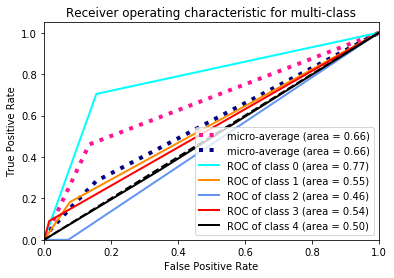




Test Train Split no.  2 





Gaussian Naive Bayes model accuracy(in %): 63.1578947368421




Confusion Matrix
[[38  2  1  0  0]
 [ 4  5  0  1  1]
 [ 0  3  3  3  1]
 [ 0  5  2  2  0]
 [ 0  0  1  4  0]]




F1 Score
0.6210142962141996




ROC Curve


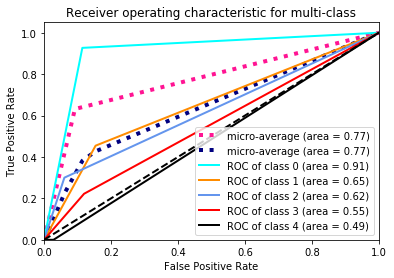




Test Train Split no.  3 





Gaussian Naive Bayes model accuracy(in %): 46.05263157894737




Confusion Matrix
[[27  2  2  0  5]
 [ 7  2  2  0  7]
 [ 1  1  2  0  3]
 [ 0  0  3  1  7]
 [ 0  0  0  1  3]]




F1 Score
0.4576396101572867




ROC Curve


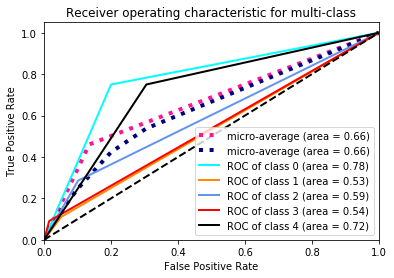




Test Train Split no.  4 





Gaussian Naive Bayes model accuracy(in %): 53.94736842105263




Confusion Matrix
[[35  2  1  0  2]
 [ 6  1  1  0  7]
 [ 1  0  1  0  7]
 [ 0  0  1  0  6]
 [ 0  0  0  1  4]]




F1 Score
0.5064203433597612




ROC Curve


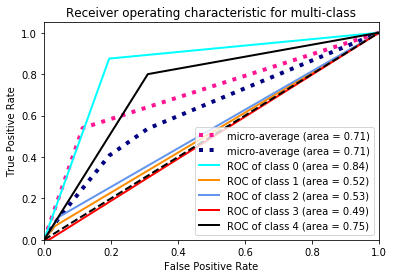




Test Train Split no.  5 





Gaussian Naive Bayes model accuracy(in %): 53.94736842105263




Confusion Matrix
[[36  2  1  0  2]
 [10  1  1  0  5]
 [ 0  1  1  2  4]
 [ 0  0  0  1  4]
 [ 0  1  0  2  2]]




F1 Score
0.5110542814717044




ROC Curve


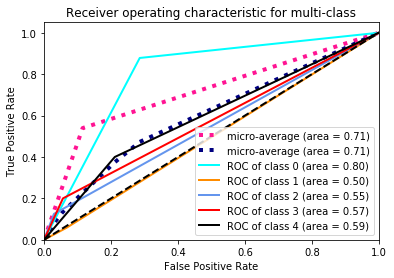

In [16]:
for z in range(5):
    print("\n\n\nTest Train Split no. ",z+1,"\n\n\n")
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=None)
    #Gaussian function of sklearn
    gnb = GaussianNB()
    gnb.fit(x_train, y_train.ravel())
    y_pred = gnb.predict(x_test)
    
    print("\n\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    
    #convert 2D array to 1D array
    y1 = y_test.ravel()
    y_pred1 = y_pred.ravel()
    
    print("\n\n\n\nConfusion Matrix")
    cf_matrix = confusion_matrix(y1, y_pred1)
    print(cf_matrix)
    
    print("\n\n\n\nF1 Score")
    f_score = f1_score(y1,y_pred1, average='weighted')
    print(f_score)
    
    #MAtrix from 1D array
    y2 = np.zeros(shape=(len(y1),5))
    y3 = np.zeros(shape=(len(y_pred1),5))
    for i in range(len(y1)):
        y2[i][int(y1[i])] = 1
        
    for i in range(len(y_pred1)):
        y3[i][int(y_pred1[i])] = 1
        
    #ROC Curve Generation
    n_classes = 5
    
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(n_classes):
        fpr[i], tpr[i],_=roc_curve(y2[:,i],y3[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    #Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"],_=roc_curve(y2.ravel(), y3.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    #Compute macro-average ROC curve and ROC area
    print("\n\n\n\nROC Curve")
    #First aggregate all false positive ratees
    lw=2
    all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    #Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        
    #Finally average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    #Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average (area = {0:0.2f})' ''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
        
    plt.plot(fpr["macro"], tpr["macro"], label='micro-average (area = {0:0.2f})'''.format(roc_auc["micro"]),color='navy', linestyle=':', linewidth=4)
    
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC of class {0} (area = {1:0.2f})' ''.format(i,roc_auc[i]))
        
    plt.plot([0,1], [0,1], 'k--', lw=lw)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()
    